In [75]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import color_sequences as cs
import glob

YEAR = '2016'

In [76]:
paths = glob.glob(f'data\\{YEAR}\\*.csv')
data = pd.concat((pd.read_csv(f) for f in paths), ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          769 non-null    object 
 1   Authors                 678 non-null    object 
 2   Author Affiliations     678 non-null    object 
 3   Publication Title       769 non-null    object 
 4   Date Added To Xplore    769 non-null    object 
 5   Publication Year        769 non-null    int64  
 6   Volume                  769 non-null    int64  
 7   Issue                   769 non-null    int64  
 8   Start Page              769 non-null    object 
 9   End Page                769 non-null    object 
 10  Abstract                769 non-null    object 
 11  ISSN                    769 non-null    object 
 12  ISBNs                   0 non-null      float64
 13  DOI                     769 non-null    object 
 14  Funding Information     463 non-null    ob

In [77]:
data.dropna(how='all', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          769 non-null    object 
 1   Authors                 678 non-null    object 
 2   Author Affiliations     678 non-null    object 
 3   Publication Title       769 non-null    object 
 4   Date Added To Xplore    769 non-null    object 
 5   Publication Year        769 non-null    int64  
 6   Volume                  769 non-null    int64  
 7   Issue                   769 non-null    int64  
 8   Start Page              769 non-null    object 
 9   End Page                769 non-null    object 
 10  Abstract                769 non-null    object 
 11  ISSN                    769 non-null    object 
 12  DOI                     769 non-null    object 
 13  Funding Information     463 non-null    object 
 14  PDF Link                769 non-null    ob

In [78]:
data = data[['Authors', 'Author Affiliations', 'Publication Year', 'Funding Information', 'Author Keywords', 'IEEE Terms']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Authors              678 non-null    object
 1   Author Affiliations  678 non-null    object
 2   Publication Year     769 non-null    int64 
 3   Funding Information  463 non-null    object
 4   Author Keywords      668 non-null    object
 5   IEEE Terms           689 non-null    object
dtypes: int64(1), object(5)
memory usage: 36.2+ KB


In [79]:
data.dropna(subset=['Authors', 'Author Affiliations'], inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Authors              678 non-null    object
 1   Author Affiliations  678 non-null    object
 2   Publication Year     678 non-null    int64 
 3   Funding Information  463 non-null    object
 4   Author Keywords      668 non-null    object
 5   IEEE Terms           676 non-null    object
dtypes: int64(1), object(5)
memory usage: 31.9+ KB


In [80]:
data.to_csv(f'data\\{YEAR}\\aggregate\\combined.csv', encoding='utf-8', index=False)
data.head(5)

,Authors,Author Affiliations,Publication Year,Funding Information,Author Keywords,IEEE Terms
0,K. Wa Leung,"City University of Hong Kong, Kowloon Tong, Ho...",2016,NaN,NaN,NaN
1,E. A. Etellisi; M. A. Elmansouri; D. S. Filipovic,"Department of Electrical, Computer, and Energy...",2016,Office of Naval Research (ONR)(grant numbers:N...,Self-interference cancellation;mutual coupling...,Spirals;Antenna radiation patterns;Bandwidth;F...
2,A. Rashidian; L. Shafai,"Peraso Technologies Inc., Toronto, ON, Canada;...",2016,Natural Sciences and Engineering Research Coun...,Compact antennas;lightweight;polymers;radiatio...,Antenna measurements;Dielectric resonator ante...
3,R. Bhattacharya; R. Garg; T. K. Bhattacharyya,"National Institute of Technology Patna, Patna,...",2016,NaN,pseudo-monopole;balun-less printed dipole;Yagi...,Dipole antennas;Yagi-Uda antennas;Antenna meas...
4,D. J. Bisharat; S. Liao; Q. Xue,"Department of Electronic Engineering, City Uni...",2016,National Basic Research Program of China (973 ...,Aperture antenna;broadband;circular polarizati...,Aperture antennas;Cavity resonators;Broadband ...


In [81]:
countries = []

# with open('auth_aff.txt', 'w', encoding='utf-8') as f:
largest = [0, 0]
for i in range(data.shape[0]):
    authors = data['Authors'][i].split('; ')
    affiliations = data['Author Affiliations'][i].split('; ')
    largest = [max([largest[0], len(authors)]), i if largest[0] < len(authors) else largest[1]]
    if len(authors) != len(affiliations):
        print(i)
        print(authors, affiliations, sep='\n')
        print(len(authors), len(affiliations))
    for author, aff in zip(authors, affiliations, strict=True):
        # f.write(f'{author}: {aff}\n')
        if aff == 'NA':
            # pass
            print(author)
        if aff.split(', ')[-1] in ('119077', ''):
            print(f'{author}: {aff}')
        countries.append(aff.split(', ')[-1])

T. Deng: Department of Electrical and Computer Engineering, National University of Singapore, 119077


In [82]:
south_korea = ('Republic of Korea', 'Korea', 'KR',)
uae = ('United Arab Emirates',)
turkey = ('Türkiye', 'Türkey', 'TR',)
hong_kong = ('Hong Kong SAR', 'Hong Kong SAR China', 'HK', 'Hong Kong.', 'Hong kong')
the_netherlands = ('Netherlands', 'The Netherland', 'NL',)
sar_china = ('SAR', 'SAR China', )
uk = ('U.K', 'UK', 'United Kingdom', 'WC1E 6BT', 'GB', )
china = ('China,', "People's Republic of China", 'P. R. China', 'China.', 'Fuzhou', 'Shanxi', 'CN', 'Xi’an', 'Beijing', 'Chongqing University', 'Ministry of Industry and Information Technology')
czechia = ('the Czech Republic', 'Czechia',)
usa = ('USA.', 'NC', 'NM', 'WI', 'CA', 'VA', 'United States', 'Princeton University', 'Zipreel Inc.', 'Berkeley', 'Massachusetts Institute of Technology', 'US',)
italy = ('Italy.', 'IT',)
macau = ('Macao',)
singapore = ('Nanyang Technological University', 'SG', '138632', '119077')
canada = ('Irdeto Canada',)
taiwan = ('ROC', 'R.O.C', 'R.O.C.')
lebanon = ('Louaize',)
ireland = ('Antenna High Frequency Research Centre',)
spain = ('Universidad de Oviedo', 'ES',)
belgium = ('Louvain-la-Neuve', 'BE')
australia = ('AU',)
serbia = ('RS',)
algeria = ('Algérie',)
india = ('IN', 'Karnataka', )
south_africa = ('ZA',)
thailand = ('TH',)
france = ('FR',)
finland = ('FI',)
japan = ('JP',)
iran = ('IR',)
germany = ('DE',)
denmark = ('DK', )
ivory_coast = ('Cäte d’Ivoire')
israel = ('Beersheba',)

In [83]:
countries = pd.Series(countries, dtype=str)
countries = countries.replace(south_korea, 'South Korea')
countries = countries.replace(uae, 'UAE')
countries = countries.replace(turkey, 'Turkey')
countries = countries.replace(hong_kong, 'Hong Kong')
countries = countries.replace(the_netherlands, 'The Netherlands')
countries = countries.replace(sar_china, 'SAR China')
countries = countries.replace(uk, 'U.K.')
countries = countries.replace(china, 'China')
countries = countries.replace(czechia, 'Czech Republic')
countries = countries.replace(usa, 'USA')
countries = countries.replace(italy, 'Italy')
countries = countries.replace(macau, 'Macau')
countries = countries.replace(singapore, 'Singapore')
countries = countries.replace(canada, 'Canada')
countries = countries.replace(taiwan, 'Taiwan')
countries = countries.replace(lebanon, 'Lebanon')
countries = countries.replace(ireland, 'Ireland')
countries = countries.replace(spain, 'Spain')
countries = countries.replace(belgium, 'Belgium')
countries = countries.replace(australia, 'Australia')
countries = countries.replace(serbia, 'Serbia')
countries = countries.replace(algeria, 'Algeria')
countries = countries.replace(india, 'India')
countries = countries.replace(south_africa, 'South Africa')
countries = countries.replace(thailand, 'Thailand')
countries = countries.replace(france, 'France')
countries = countries.replace(finland, 'Finland')
countries = countries.replace(japan, 'Japan')
countries = countries.replace(iran, 'Iran')
countries = countries.replace(germany, 'Germany')
countries = countries.replace(denmark, 'Denmark')
countries = countries.replace(ivory_coast, 'Ivory Coast')
countries = countries.replace(israel, 'Israel')
print(countries.info())
countries = countries[countries != 'NA']
print(countries.info())
counts = countries.value_counts()
# counts = counts[counts >= 10]
print(counts)
labels = list(counts.keys())
values = list(counts.values)
counts.to_csv('look.csv')

<class 'pandas.core.series.Series'>
RangeIndex: 2459 entries, 0 to 2458
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
2459 non-null   object
dtypes: object(1)
memory usage: 19.3+ KB
None
<class 'pandas.core.series.Series'>
Index: 2459 entries, 0 to 2458
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
2459 non-null   object
dtypes: object(1)
memory usage: 38.4+ KB
None
China              695
USA                373
Canada             122
Italy              118
France             113
U.K.                93
Spain               92
Belgium             72
Hong Kong           68
Australia           67
India               58
South Korea         58
Finland             53
Iran                47
Singapore           45
Turkey              43
Germany             40
Japan               36
The Netherlands     34
Taiwan              34
Sweden              24
Poland              22
Portugal            18
Greece              13
Russia              12
Switzerland         

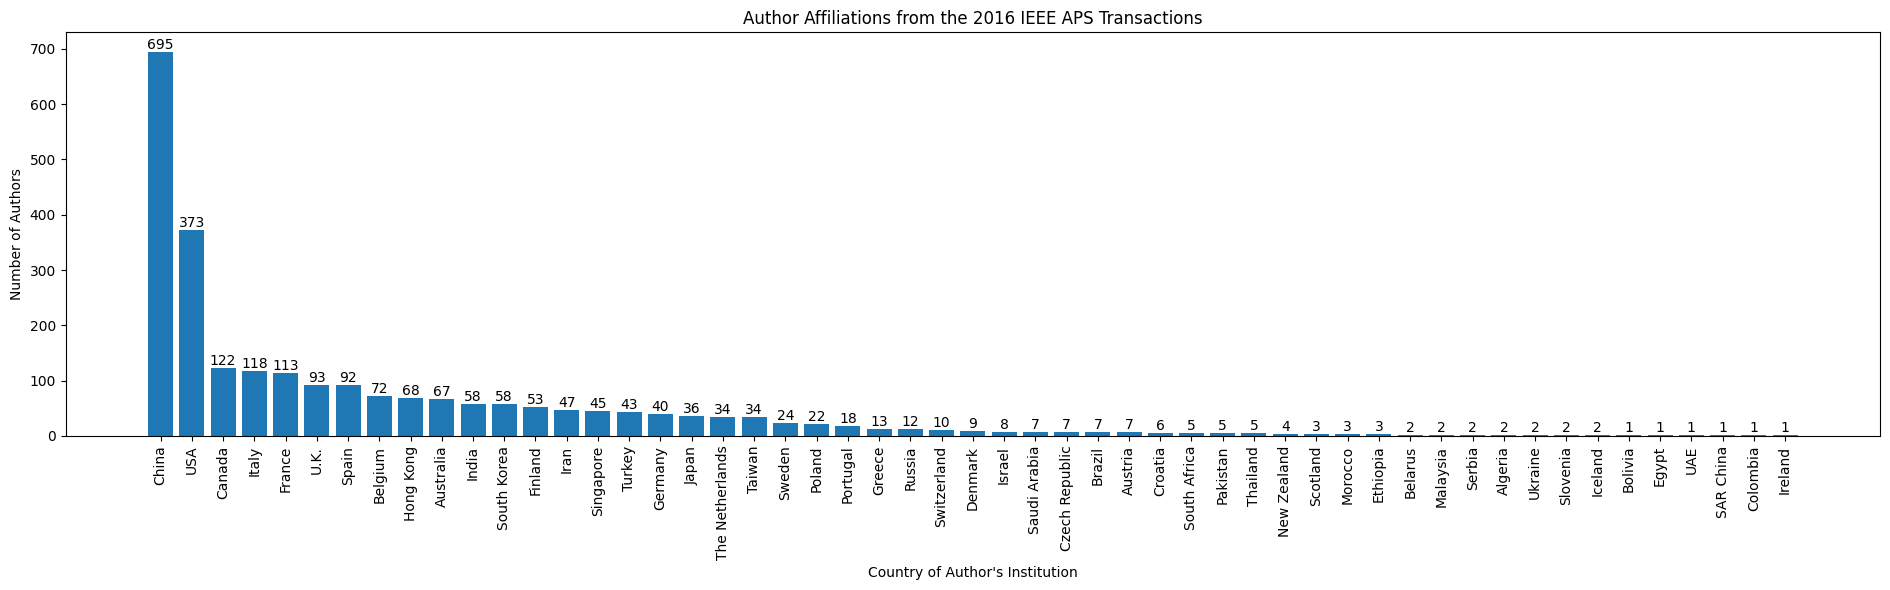

In [84]:
fig, ax = plt.subplots(figsize=(19, 6))
bar_cont = ax.bar(labels, values)
# ax.set(ylim=(0, 1999))
plt.xlabel('Country of Author\'s Institution')
plt.ylabel('Number of Authors')
plt.title(f'Author Affiliations from the {YEAR} IEEE APS Transactions')
plt.xticks(rotation=90)
ax.bar_label(bar_cont)
plt.tight_layout()
plt.savefig(f'figures\\{YEAR}\\{YEAR}_authors_by_country.png', bbox_inches='tight')
plt.show()

In [85]:
super_counts = counts[counts >= 75]
full = counts.sum()
filtered = super_counts.sum()

super_counts['All Other Countries'] = full - filtered

labels = list(super_counts.keys())
values = list(super_counts.values)


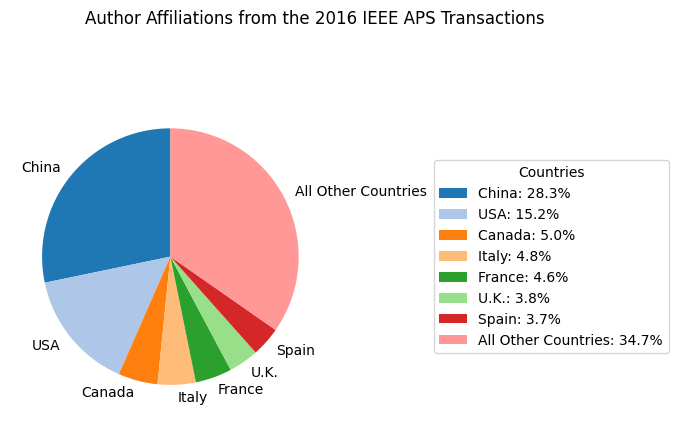

In [86]:

fig, ax = plt.subplots()
wedges, texts = ax.pie(values, labels=labels, startangle=90, colors=cs['tab20'])
percent = [f'{label}: {value/sum(values) * 100:.1f}%' for label, value in zip(labels, values, strict=True)]
ax.legend(wedges, percent, title='Countries', loc='center left', bbox_to_anchor=(1.3, 0, 0.5, 1))
fig.suptitle(f'Author Affiliations from the {YEAR} IEEE APS Transactions')
plt.tight_layout()
plt.savefig(f'figures\\{YEAR}\\{YEAR}_authors_PIE.png', bbox_inches='tight')
plt.show()